<a href="https://colab.research.google.com/github/shalita-wahyudhie/Churn-Predicting-Models/blob/main/models_building_and_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df = df.drop(columns = ['RowNumber','CustomerId','Surname'])

## Exploratory Data Analysis

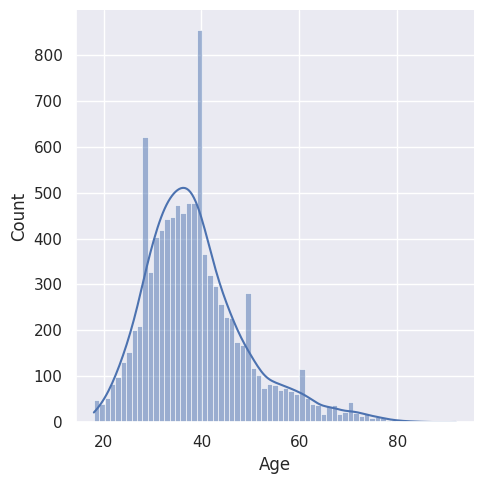

In [ ]:
sns.set_theme()
sns.displot(df['Age'], kde=True)

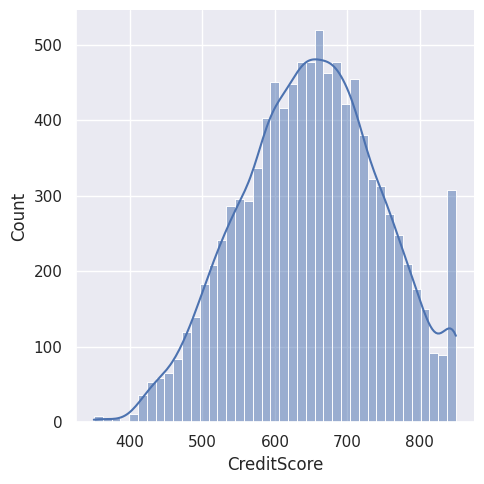

In [ ]:
sns.displot(df['CreditScore'], kde=True)

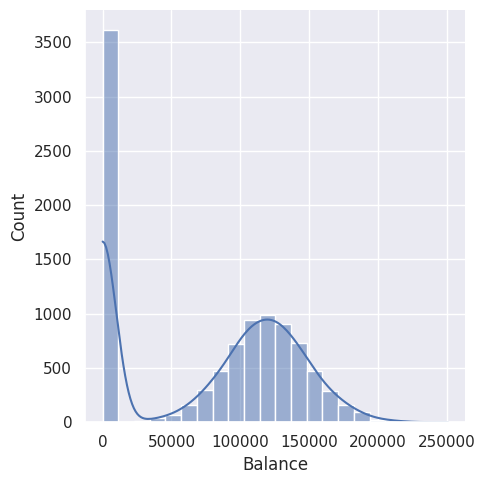

In [ ]:
sns.displot(df['Balance'], kde=True)

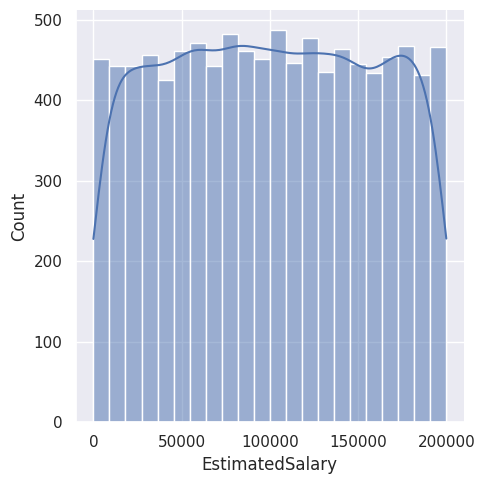

In [ ]:
sns.displot(df['EstimatedSalary'], kde=True)

In [ ]:
df[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
CreditScore,-0.071607,-0.425726
Balance,-0.141109,-1.489412
EstimatedSalary,0.002085,-1.181518


*   Age dan EstimatedSalary memiliki skew lebih besar dari 0, distribusi cenderung menjulur ke kanan, yang berarti bahwa rataan > median. 
*   Creditscore dan Balance memiliki skew lebih kecil dari 0, distribusi cenderung menjulur ke kiri, yang berarti bahwa rataan < median. 
*   Baik Age, CreditScore, Balance, dan EstimatedSalary memiliki kurtosis kurang dari 3, dikatakan sebagai platikurtik, yang artinya cenderung menghasilkan outlier yang lebih sedikit dan tidak terlalu ekstrem daripada distribusi normal.

<ipython-input-14-d5d04924ab81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidth=2)


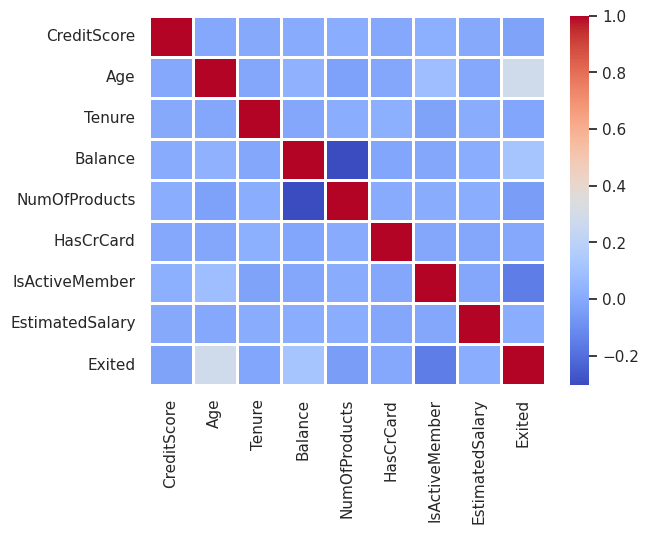

In [ ]:
ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidth=2)

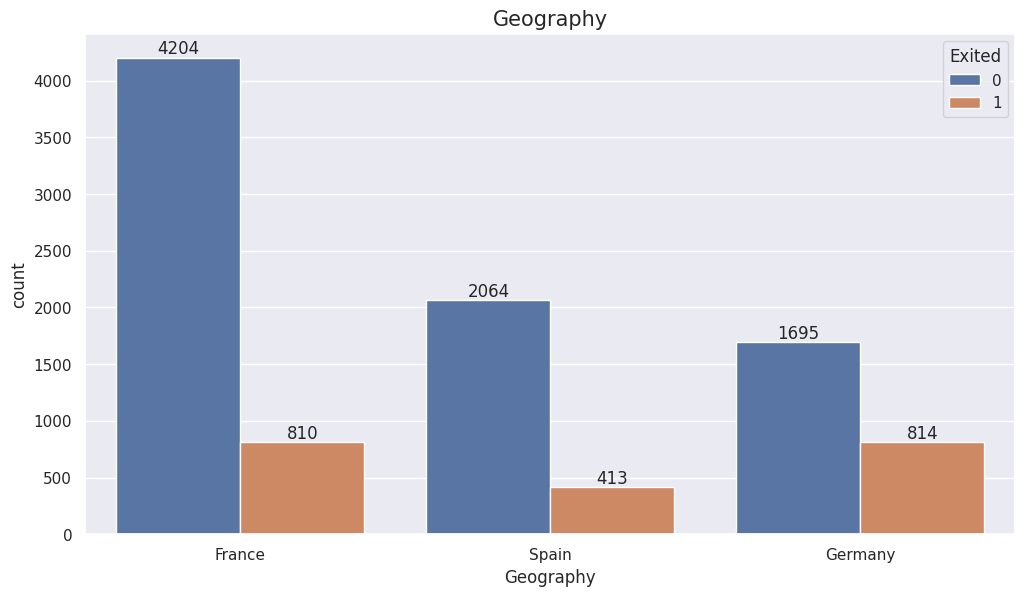

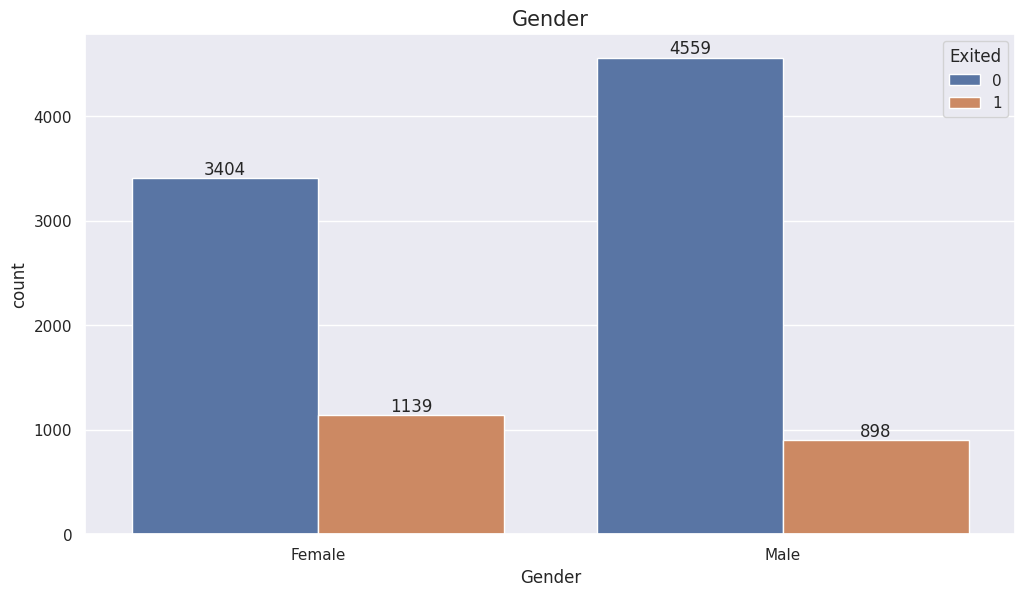

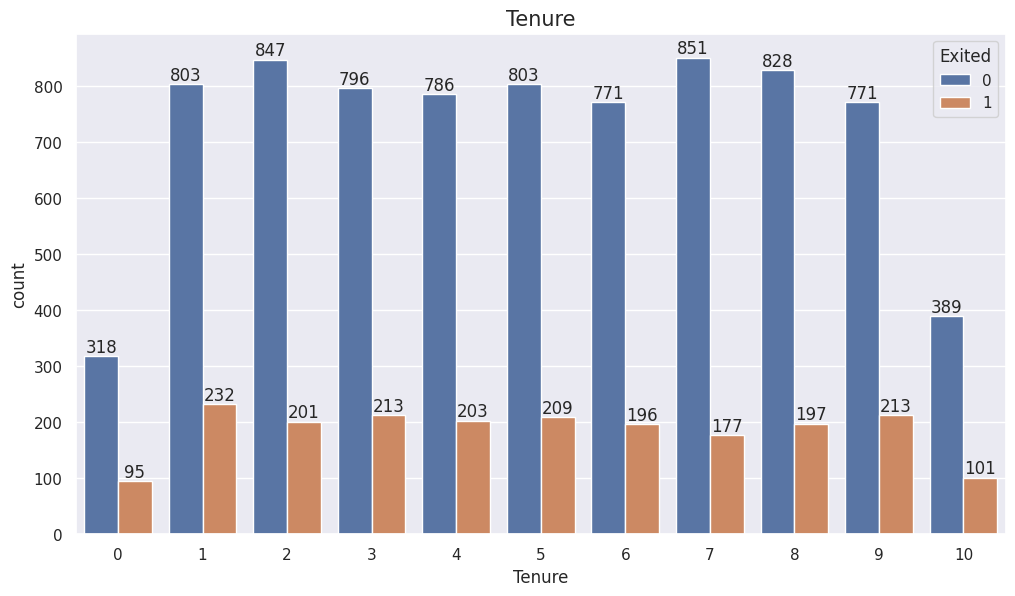

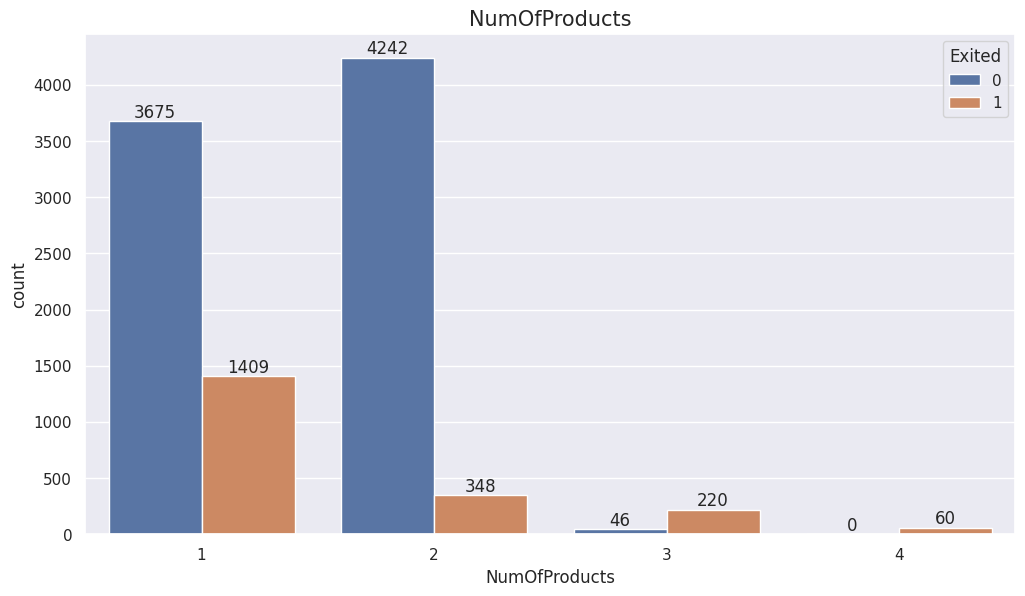

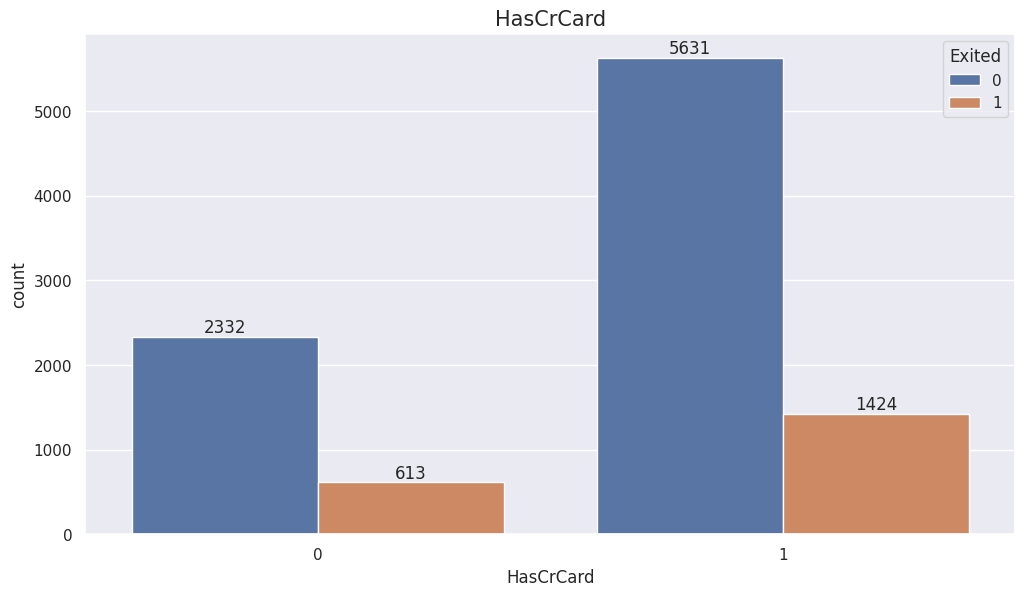

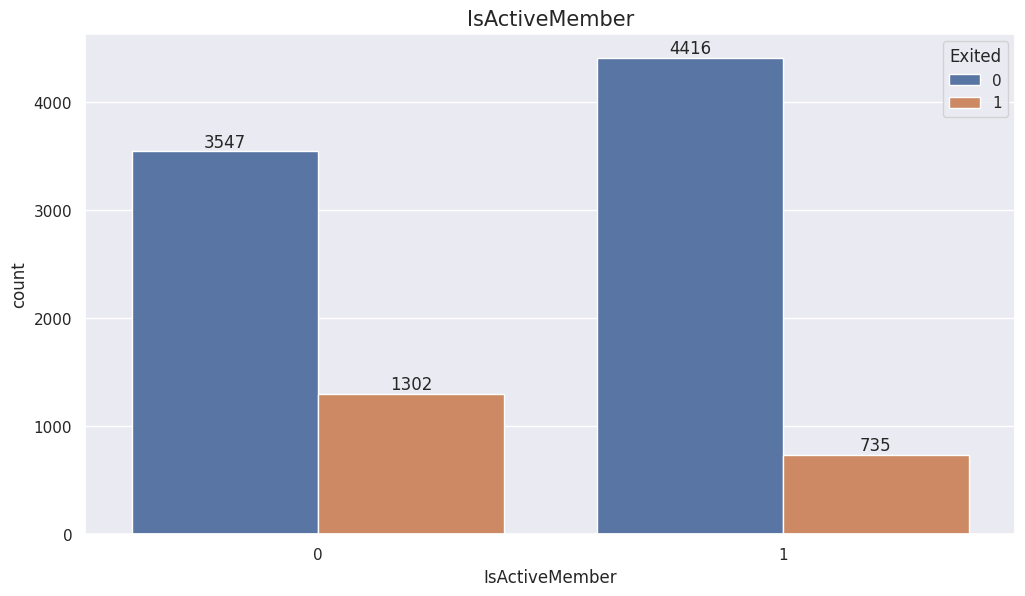

In [ ]:
#create a list of categorical features and plot them
list_of_cat_features = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15)
    ax = sns.countplot(data = df, x = df[feature], hue = 'Exited')
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

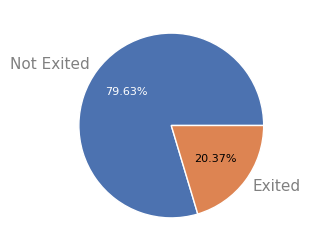

In [ ]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%')

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

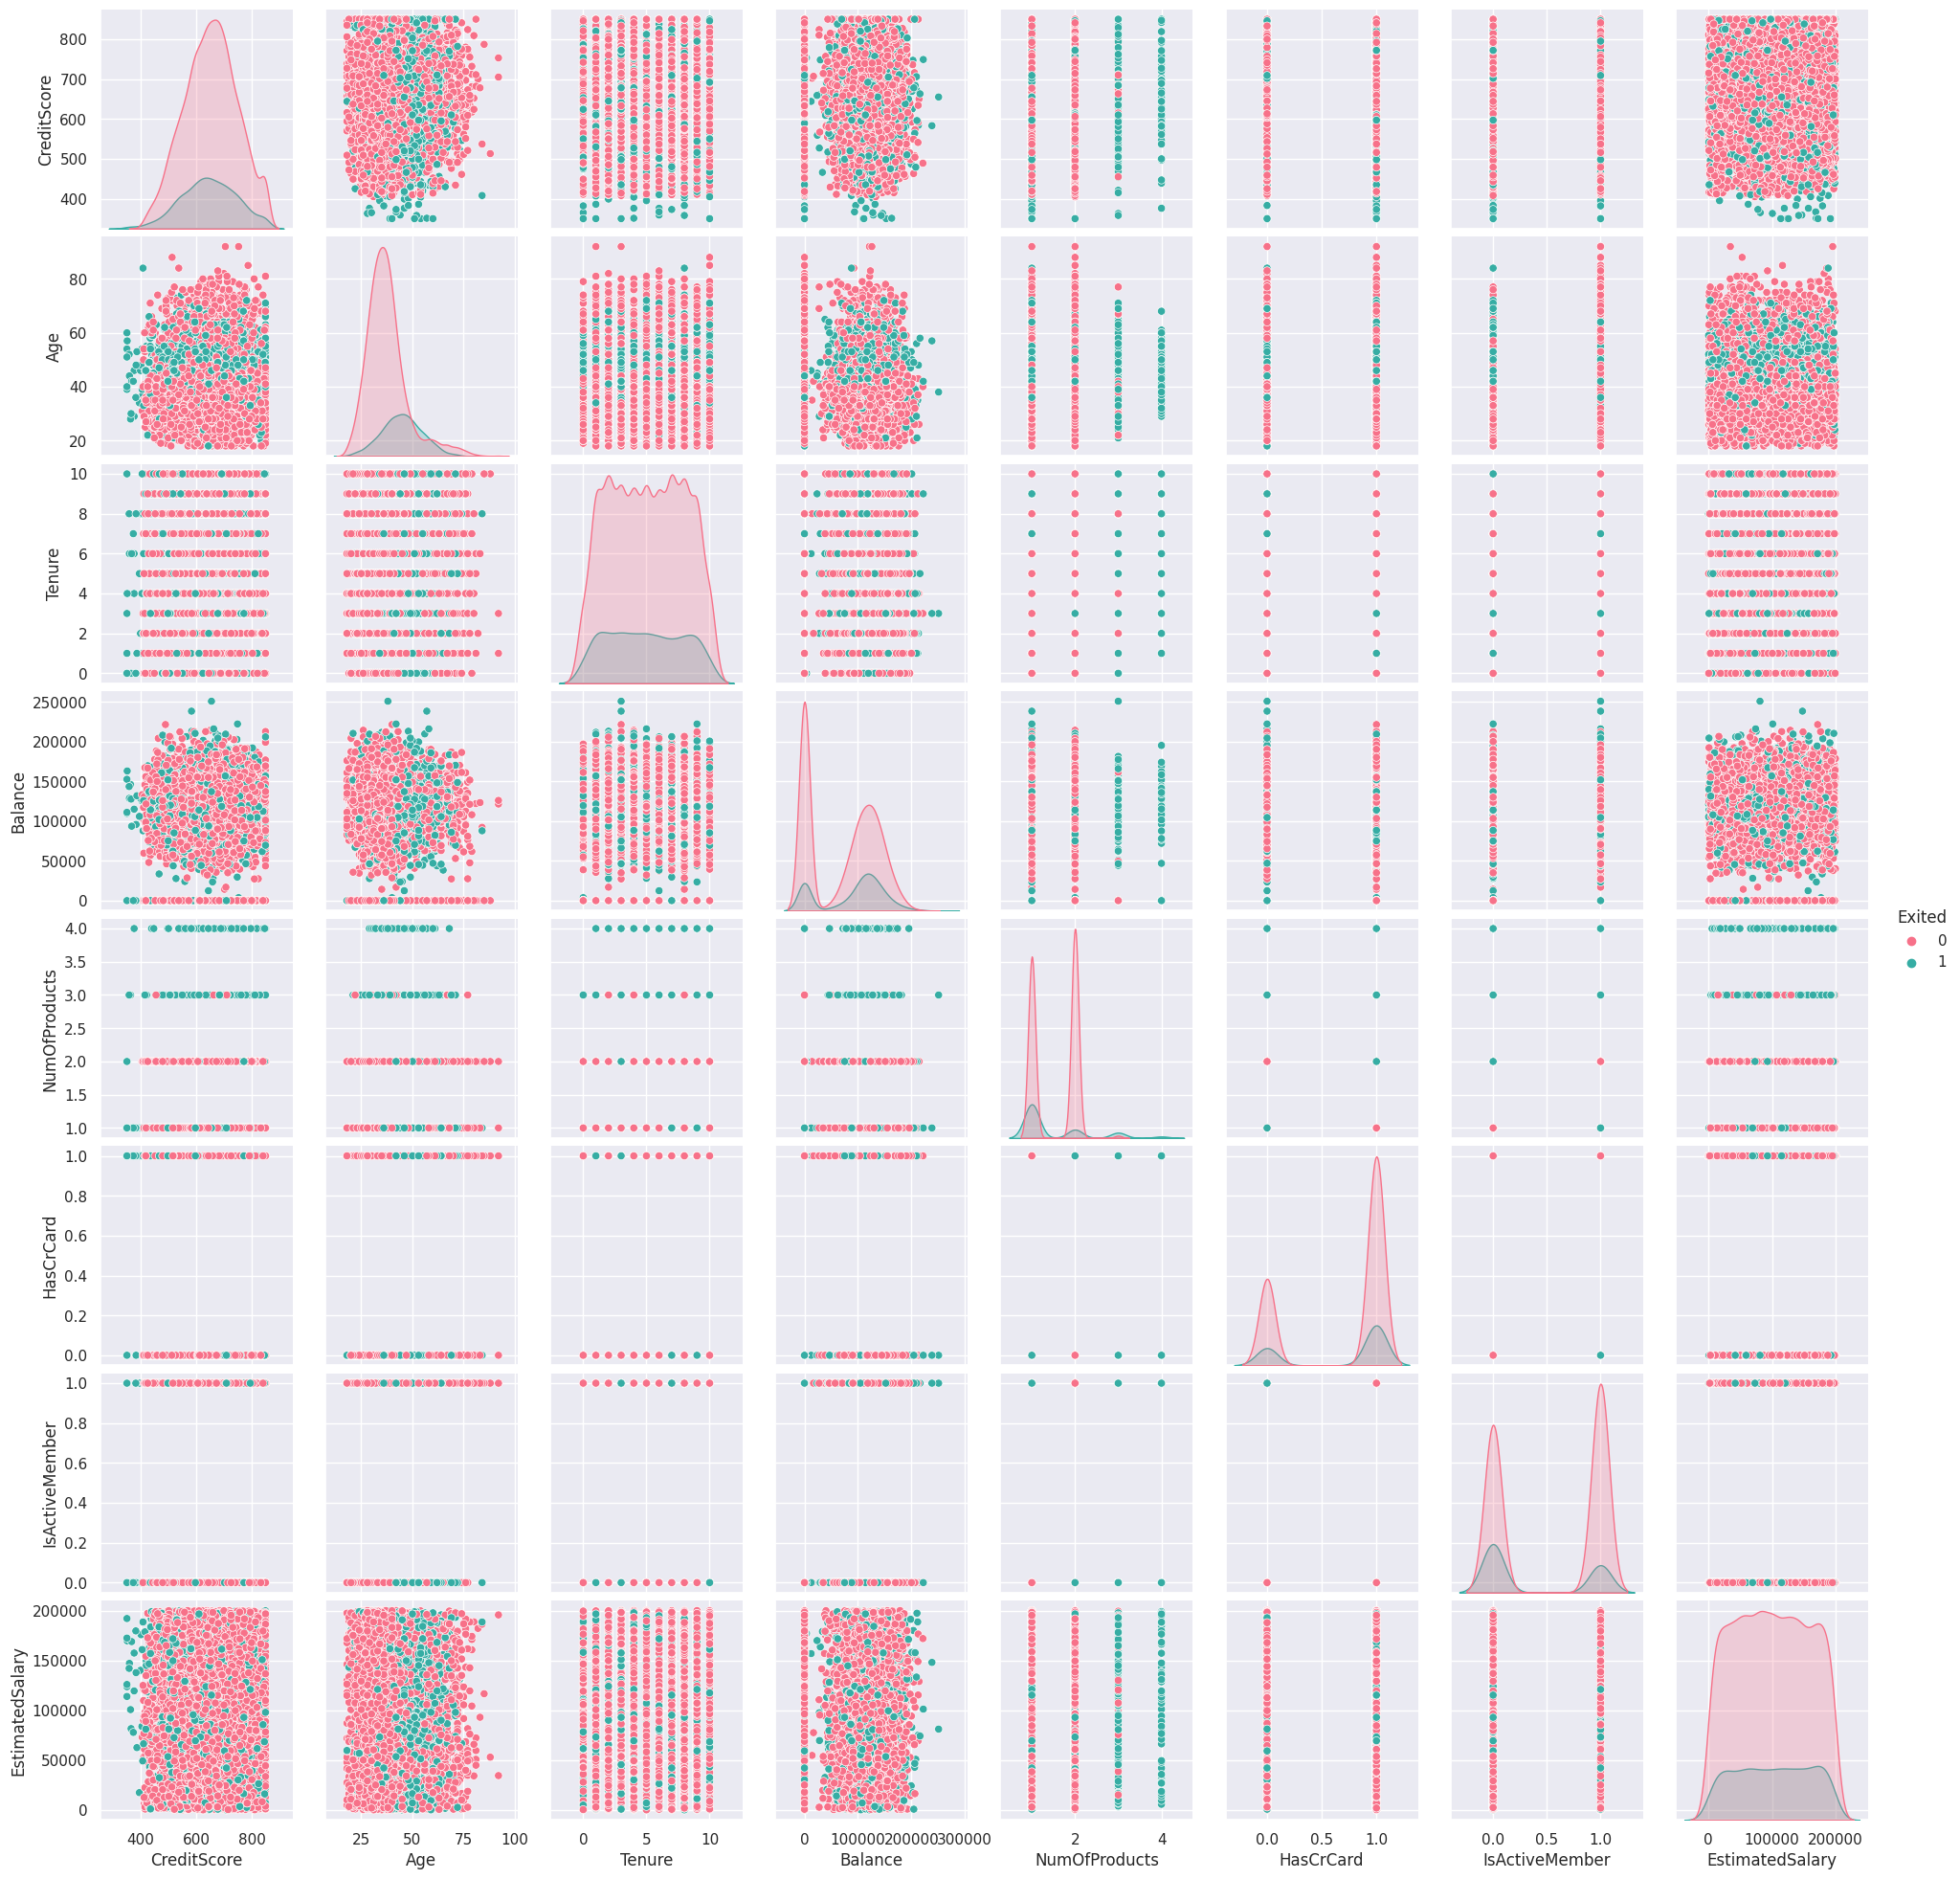

In [ ]:
sns.pairplot(df,hue='Exited',palette='husl')

## Get Dummy Data

In [ ]:
df = pd.get_dummies(data=df, columns=['Geography','Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train = df.drop('Exited', axis=1)
y_train = df.Exited.values

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

## SMOTE

In [ ]:
# from imblearn.combine import SMOTEENN

# # define undersampling strategy
# oversample = SMOTEENN()

# # fit and apply the transform
# X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# print("After oversampling: ", Counter(y_train_over))

## Training Data

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Define the classification models to train
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier()))

# Define the number of folds for cross-validation
num_folds = 10

# Split the dataset into folds
kfold = KFold(n_splits=num_folds, shuffle=True)

# Evaluate each model with cross-validation
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='f1_macro', error_score='raise')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

Logistic Regression: 0.6012102116482793 (0.01500968223199673)
Decision Tree: 0.6869167040121993 (0.020499345337108853)
Random Forest: 0.7486239674727019 (0.012060057988216872)
Ada Boost: 0.74264235017113 (0.017277164016039504)
Gradient Boosting: 0.7509003597514756 (0.015686736619900134)
SVM: 0.7216587640438428 (0.012533422230125388)
Gaussian NB: 0.6703375618502015 (0.01748616627164106)
KNN: 0.6966049966313731 (0.012352193736229705)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP: 0.7510413410498739 (0.016712299487097803)
LDA: 0.6089406119548111 (0.025541518617945878)
QDA: 0.6920220689750232 (0.017207637527470135)
XGB: 0.7451113162709415 (0.015557368122148222)


## Best Model

In [ ]:
# Print the best results and corresponding model name
best_idx = np.argmax(np.mean(results, axis=1))
print(f"Best model: {names[best_idx]} with F1 score of {np.mean(results[best_idx])}")

Best model: MLP with F1 score of 0.7510413410498739


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameters to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'random_state': [123]
}

# Define the grid search object with F1 score as the evaluation metric
grid_search = GridSearchCV(xgb, param_grid=param_grid, scoring='f1_macro', cv=10, n_jobs=-1)

# Measure the start time
start_time = time.time()
# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train)

# Measure the end time
end_time = time.time()

# Print
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_}")
print(f"Execution time: {end_time - start_time:.2f} seconds")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'random_state': 123}
Best F1 score: 0.7580844509085511
Execution time: 237.35 seconds


## Artificial Neural Network

In [ ]:
import tensorflow as tf

# Define F1 score as a custom metric function
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_score = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1_score
    
# Import the Sequential model from the Keras API
from keras.models import Sequential

# Import the Dense layer, which represents a fully connected layer in a neural network
from keras.layers import Dense

# Calculate the number of input features by getting the number of columns in the training data
num_features = X_train_scaled.shape[1]

# Define the neural network architecture as a sequence of layers
model = Sequential()
# Add a fully connected layer with 16 neurons, using the ReLU activation function. This is the input layer, so we specify the number of input features using input_dim.
model.add(Dense(16, input_dim=num_features, activation='relu'))

# Add a second fully connected layer with 8 neurons, using the ReLU activation function.
model.add(Dense(8, activation='relu'))

# Add a final fully connected layer with 1 neuron, using the sigmoid activation function. This is the output layer, so we use a single neuron to output a binary classification prediction.
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function, Adam optimizer, and accuracy as the evaluation metric.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_score])
# Train the model for 100 epochs, using a batch size of 32, and splitting off 10% of the training data for validation. The training history is saved to history for later analysis.
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
282/282 [==============================] - 2s 3ms/step - loss: 0.5084 - f1_score: 0.0856 - val_loss: 0.4287 - val_f1_score: 0.0749
Epoch 2/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4340 - f1_score: 0.2012 - val_loss: 0.4137 - val_f1_score: 0.2819
Epoch 3/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4154 - f1_score: 0.3544 - val_loss: 0.4011 - val_f1_score: 0.3683
Epoch 4/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4018 - f1_score: 0.4067 - val_loss: 0.3845 - val_f1_score: 0.3606
Epoch 5/100
282/282 [==============================] - 1s 2ms/step - loss: 0.3886 - f1_score: 0.4275 - val_loss: 0.3733 - val_f1_score: 0.4079
Epoch 6/100
282/282 [==============================] - 1s 2ms/step - loss: 0.3750 - f1_score: 0.4649 - val_loss: 0.3637 - val_f1_score: 0.4549
Epoch 7/100
282/282 [==============================] - 1s 2ms/step - loss: 0.3638 - f1_score: 0.5017 - val_loss: 0.3554 - val_f1_score: 0.4835